# 1. Data import

## 1.1 Importing the dataframes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import math as math
from scipy import stats
import importlib
import project_functions

Here, we import functions we created in a previous notebook, so we can clean / reformat the column headers

In [2]:
importlib.reload(project_functions)

<module 'project_functions' from 'c:\\Users\\Carlos\\Desktop\\Vanguard-AB-Testing\\project_functions.py'>

In [3]:
# cleaning the columns : changing the columns headers to correct format
# for more information about this function --> cf project_functions.py notebook
clean_my_columns = project_functions.clean_my_columns

Now, we 'instance' our dataframes so we precise to Python to read them:

In [4]:
# df creation
# reading the various datasets:
df_pt1 = pd.read_csv('raw_data/df_final_web_data_pt_1.txt')
df_pt2 = pd.read_csv('raw_data/df_final_web_data_pt_2.txt')
df_users = pd.read_csv('raw_data/df_final_demo.txt')
df_exp =pd.read_csv('raw_data/df_final_experiment_clients.txt')

We apply column titles cleaning to every dataframe

In [5]:
clean_my_columns(df_exp)

clean_my_columns(df_users)

clean_my_columns(df_pt1)

clean_my_columns(df_pt2)

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


## 1.2 Looking at the dataframes

### 1.2.0 Info about DF's

In [6]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [7]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [8]:
df_pt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343141 entries, 0 to 343140
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     343141 non-null  int64 
 1   visitor_id    343141 non-null  object
 2   visit_id      343141 non-null  object
 3   process_step  343141 non-null  object
 4   date_time     343141 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.1+ MB


In [9]:
df_pt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412264 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     412264 non-null  int64 
 1   visitor_id    412264 non-null  object
 2   visit_id      412264 non-null  object
 3   process_step  412264 non-null  object
 4   date_time     412264 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.7+ MB


### 1.2.1 DF "Experiment participation"

The exp dataframe states whether a client (client_id) is being redirected on the original version (control) or to the new version (test)

In [10]:
display(df_exp)
df_exp.shape

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


(70609, 2)

### 1.2.2 DF "Clients's Demographic"

In [11]:
display(df_users)
df_users.shape

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


(70609, 9)

### 1.2.3 "Footprints Data" - 2 Tables

In [12]:
display(df_pt1.head())
df_pt1.shape

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


(343141, 5)

In [13]:
display(df_pt2.head())
df_pt2.shape

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


(412264, 5)

## 1.3 Combining tables

We're combining both group of tabless due to we have the same data columns within them.

### 1.3.1 Combining Footprints Tables:

In [14]:
# Combining df_pt_1 and df_pt_2:
df_footprint=pd.concat([df_pt1,df_pt2])

In [15]:
#Now we take a overview about the concatenated table
display(df_footprint.head())

print(f"shape of pt1: {df_pt1.shape}")
print(f"shape of pt2: {df_pt2.shape}")
print(f"shape of the concat: {df_footprint.shape}")

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


shape of pt1: (343141, 5)
shape of pt2: (412264, 5)
shape of the concat: (755405, 5)


Let's see how many unique clients we have data.

In [16]:
# Number of clients
df_footprint['client_id'].nunique()

120157

### 1.3.2 Combining Demo and Experiment tables

Experiment a demo tables have the exactly same shape and they have client_id in common, soy we are going to merge them to have the second column from experiment as another variable in our big table "demographics". 

In [17]:
df_clients = df_users.merge(df_exp, on='client_id', how='left')

In [18]:
df_clients = df_clients.reset_index(drop=True)

In [19]:
display(df_clients)
df_clients.shape

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


(70609, 10)

# 2. Cleaning Dataframes

## 2.1 Cleaning Clients Table

### 2.1.1 Duplicates

In [20]:
# Let's check how many duplicated rows there are.
duplicates_clients = df_clients.duplicated(keep=False)
df_duplicates_clients = df_clients[duplicates_clients]

print(df_duplicates_clients)

Empty DataFrame
Columns: [client_id, clnt_tenure_yr, clnt_tenure_mnth, clnt_age, gendr, num_accts, bal, calls_6_mnth, logons_6_mnth, variation]
Index: []


In [21]:
# Deleting all duplicates
df_clients_nd = df_clients.drop_duplicates(keep=False)

print(df_clients_nd)

       client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0         836976             6.0              73.0      60.5     U        2.0   
1        2304905             7.0              94.0      58.0     U        2.0   
2        1439522             5.0              64.0      32.0     U        2.0   
3        1562045            16.0             198.0      49.0     M        2.0   
4        5126305            12.0             145.0      33.0     F        2.0   
...          ...             ...               ...       ...   ...        ...   
70604    7993686             4.0              56.0      38.5     U        3.0   
70605    8981690            12.0             148.0      31.0     M        2.0   
70606     333913            16.0             198.0      61.5     F        2.0   
70607    1573142            21.0             255.0      68.0     M        3.0   
70608    5602139            21.0             254.0      59.5     F        3.0   

              bal  calls_6_

### 2.1.2 Nulls

In [22]:
missing_clients_data = df_clients_nd.isnull().sum()
print(missing_clients_data)

client_id               0
clnt_tenure_yr         14
clnt_tenure_mnth       14
clnt_age               15
gendr                  14
num_accts              14
bal                    14
calls_6_mnth           14
logons_6_mnth          14
variation           20109
dtype: int64


We procced to drop rows with nulls data (20109 rows)

In [23]:
df_clients_nd_nn = df_clients_nd.dropna()

print(df_clients_nd_nn)

       client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0         836976             6.0              73.0      60.5     U        2.0   
1        2304905             7.0              94.0      58.0     U        2.0   
2        1439522             5.0              64.0      32.0     U        2.0   
3        1562045            16.0             198.0      49.0     M        2.0   
4        5126305            12.0             145.0      33.0     F        2.0   
...          ...             ...               ...       ...   ...        ...   
50495    1780858            21.0             262.0      68.5     M        3.0   
50496    6967120            21.0             260.0      68.5     M        3.0   
50497    5826160            20.0             249.0      56.5     F        2.0   
50498    8739285            19.0             229.0      69.5     F        2.0   
50499    7468138            18.0             222.0      61.0     F        3.0   

              bal  calls_6_

### 2.1.3 Column client_id

* Checking unique values

In [24]:
df_clients_nd_nn.shape

(50487, 10)

In [25]:
df_clients_nd_nn['client_id'].nunique()

50487

Unique values for id_client is the same than shape, so we assume it is cleaned.

### 2.1.4 Column clnt_tenure_yr

In [26]:
display(df_clients_nd_nn['clnt_tenure_yr'])
print(f"Valor mínimo: {df_clients_nd_nn['clnt_tenure_yr'].min()}")
print(f"Valor máximo: {df_clients_nd_nn['clnt_tenure_yr'].max()}")

0         6.0
1         7.0
2         5.0
3        16.0
4        12.0
         ... 
50495    21.0
50496    21.0
50497    20.0
50498    19.0
50499    18.0
Name: clnt_tenure_yr, Length: 50487, dtype: float64

Valor mínimo: 2.0
Valor máximo: 55.0


We change the column datatype:

In [27]:
df_clients_nd_nn['clnt_tenure_yr'] = df_clients_nd_nn['clnt_tenure_yr'].astype(int)

C:\Users\Carlos\AppData\Local\Temp\ipykernel_6892\2219402206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients_nd_nn['clnt_tenure_yr'] = df_clients_nd_nn['clnt_tenure_yr'].astype(int)


In [28]:
df_clients_nd_nn['clnt_tenure_yr'].unique()

array([ 6,  7,  5, 16, 12, 30, 15,  8,  4,  3, 10, 11, 13, 14, 19, 18, 25,
       23, 21, 17,  9, 27, 24, 20, 28, 22, 29, 46, 26, 32, 33, 35,  2, 38,
       31, 48, 34, 36, 51, 47, 49, 37, 39, 40, 55, 42, 44, 43, 50, 54, 41,
       45, 52])

### 2.1.5 Column clnt_tenure_mnth

In [29]:
display(df_clients_nd_nn['clnt_tenure_mnth'])
print(f"Valor mínimo: {df_clients_nd_nn['clnt_tenure_mnth'].min()}")
print(f"Valor máximo: {df_clients_nd_nn['clnt_tenure_mnth'].max()}")

0         73.0
1         94.0
2         64.0
3        198.0
4        145.0
         ...  
50495    262.0
50496    260.0
50497    249.0
50498    229.0
50499    222.0
Name: clnt_tenure_mnth, Length: 50487, dtype: float64

Valor mínimo: 33.0
Valor máximo: 669.0


We change the column datatype:

In [30]:
df_clients_nd_nn['clnt_tenure_mnth'] = df_clients_nd_nn['clnt_tenure_mnth'].astype(int)

C:\Users\Carlos\AppData\Local\Temp\ipykernel_6892\143528322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients_nd_nn['clnt_tenure_mnth'] = df_clients_nd_nn['clnt_tenure_mnth'].astype(int)


In [31]:
df_clients_nd_nn['clnt_tenure_mnth'].unique()

array([ 73,  94,  64, 198, 145,  71,  66, 361, 369, 189, 100,  99,  67,
       193,  58,  47, 122, 136, 101, 103,  70, 152, 160,  80,  88,  86,
        65,  68,  93,  85, 168, 142, 228, 223, 305, 286, 285, 280, 254,
       253, 278, 221, 216, 212, 204, 260, 116, 130, 177, 159, 190,  89,
        91, 129, 329,  92,  82, 169, 239,  69, 178,  95,  63, 187, 288,
       261, 251, 250,  56,  60, 123, 175, 188,  59, 336, 149, 156, 330,
       155, 167,  96, 242, 163,  81, 182, 134, 113, 172, 120, 105, 271,
       244, 200, 157,  78, 151, 121, 184, 335, 357, 111, 185,  76, 148,
        97,  83, 347, 324, 162, 194,  74, 186, 300, 289, 295, 282, 270,
       246, 229, 206, 109, 343, 176, 144, 161, 179, 106, 154, 119,  75,
       166, 143, 202, 326, 298, 290, 279, 252,  57, 334, 150,  46, 114,
       174,  72, 107, 164, 131, 554, 140, 118, 292, 273, 257, 225, 128,
       135, 258, 126, 359, 210, 263, 262, 255, 214, 310, 141, 319, 395,
       108, 181, 173,  55, 203, 297, 213, 183, 115, 117, 299, 28

Let's see if moonths and years of tenure are coherent. 

In [32]:
# Comprobamos si hay filas donde los meses son mayores o iguales a 12 pero no coinciden con los años
df_inconsistencias = df_clients_nd_nn[(df_clients_nd_nn['clnt_tenure_mnth'] >= 12) & (df_clients_nd_nn['clnt_tenure_yr'] != df_clients_nd_nn['clnt_tenure_mnth'] // 12)]

# Mostrar filas con inconsistencias
print(df_inconsistencias)

       client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
113      7045562               7                96      33.5     U        3.0   
1035     6895833               7                96      58.5     U        2.0   
1529     6915261              11               144      46.0     F        2.0   
1648      911208              11               144      34.5     M        2.0   
1703      346409              15               192      48.5     M        2.0   
2196     3071537               3                48      31.5     U        2.0   
12235    1114136              15               192      60.0     M        3.0   
13343    7041735              11               144      22.5     F        2.0   
16310    7479669              23               288      75.0     M        3.0   
23813    2798244               7                96      33.5     U        2.0   
24424    1230061              15               192      51.0     M        2.0   
24793    8996903            

Let's drop that inconsistences:

In [33]:
df_clients_nd_nn_in = df_clients_nd_nn.drop(df_inconsistencias.index)

### 2.1.6 Column client_age

In [34]:
display(df_clients_nd_nn_in['clnt_age'])
print(f"Valor mínimo: {df_clients_nd_nn_in['clnt_age'].min()}")
print(f"Valor máximo: {df_clients_nd_nn_in['clnt_age'].max()}")

0        60.5
1        58.0
2        32.0
3        49.0
4        33.0
         ... 
50495    68.5
50496    68.5
50497    56.5
50498    69.5
50499    61.0
Name: clnt_age, Length: 50456, dtype: float64

Valor mínimo: 17.0
Valor máximo: 96.0


We round the client's age.We add the column.

In [35]:
df_clients_nd_nn_in['edad_redondeada'] = df_clients_nd_nn_in['clnt_age'].round()

And we assign to rounded_aged a int datatype

In [36]:
df_clients_nd_nn_in['edad_redondeada'] = df_clients_nd_nn_in['edad_redondeada'].astype(int)

Let's graph ages

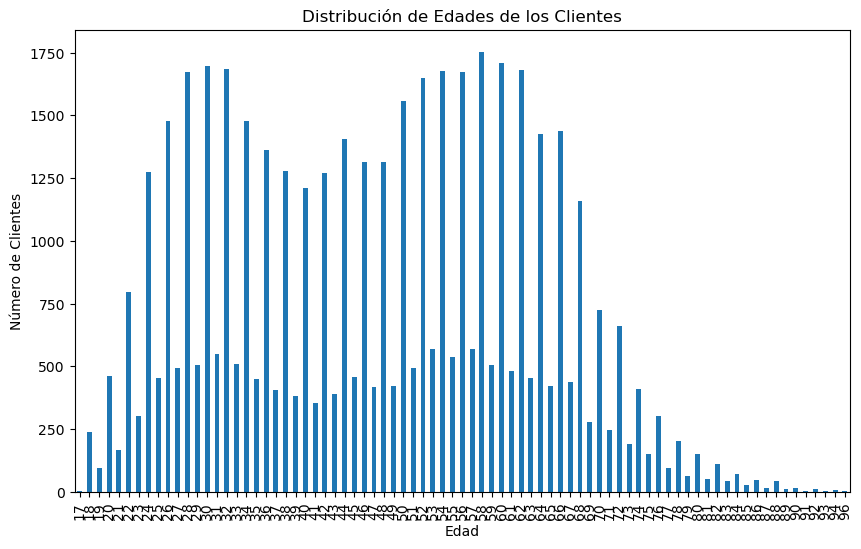

In [37]:
# Supongamos que tu DataFrame tiene una columna llamada 'edad'
df_clients_nd_nn_in['edad_redondeada'].value_counts().sort_index().plot(kind='bar', figsize=(10,6))

# Añadir título y etiquetas
plt.title('Distribución de Edades de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Número de Clientes')

# Mostrar el gráfico
plt.show()

### 2.1.7 Column gender

In [38]:
display(df_clients_nd_nn_in['gendr'])
print(f"Valor mínimo: {df_clients_nd_nn_in['gendr'].min()}")
print(f"Valor máximo: {df_clients_nd_nn_in['gendr'].max()}")

0        U
1        U
2        U
3        M
4        F
        ..
50495    M
50496    M
50497    F
50498    F
50499    F
Name: gendr, Length: 50456, dtype: object

Valor mínimo: F
Valor máximo: X


Check unique values

In [39]:
unique_genders = df_clients_nd_nn_in['gendr'].unique()
count_genders = df_clients_nd_nn_in['gendr'].value_counts()
print("\nValores únicos en la columna 'gendr':")
print(unique_genders)
print(count_genders)


Valores únicos en la columna 'gendr':
['U' 'M' 'F' 'X']
gendr
U    17266
M    16936
F    16252
X        2
Name: count, dtype: int64


Let's replace X by U in those 2 values with X gender. 

In [40]:
df_clients_nd_nn_in['gendr'] = df_clients_nd_nn_in['gendr'].replace('X', 'U')

In [41]:
# In case you wannna drop those.
# df_clients_nd_nn_in_gdr = df_clients_nd_nn_in[df_clients_nd_nn_in['gendr'] != 'X']

### 2.1.8 Column num_accts

In [42]:
display(df_clients_nd_nn_in['num_accts'])
print(f"Valor mínimo: {df_clients_nd_nn_in['num_accts'].min()}")
print(f"Valor máximo: {df_clients_nd_nn_in['num_accts'].max()}")

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
50495    3.0
50496    3.0
50497    2.0
50498    2.0
50499    3.0
Name: num_accts, Length: 50456, dtype: float64

Valor mínimo: 1.0
Valor máximo: 7.0


We change the column datatype:

In [43]:
df_clients_nd_nn_in['num_accts'] = df_clients_nd_nn_in['num_accts'].astype(int)

In [44]:
df_clients_nd_nn_in['num_accts'].value_counts()

num_accts
2    39700
3     8937
4     1585
5      204
6       23
7        6
1        1
Name: count, dtype: int64

### 2.1.9 Column bal

In [45]:
display(df_clients_nd_nn_in['bal'])
print(f"Valor mínimo: {df_clients_nd_nn_in['bal'].min()}")
print(f"Valor máximo: {df_clients_nd_nn_in['bal'].max()}")

0          45105.30
1         110860.30
2          52467.79
3          67454.65
4         103671.75
            ...    
50495     372100.59
50496    4279873.38
50497      44837.16
50498      44994.24
50499     209278.15
Name: bal, Length: 50456, dtype: float64

Valor mínimo: 23789.44
Valor máximo: 16320040.15


In [46]:
df_clients_nd_nn_in['num_accts'].value_counts()

num_accts
2    39700
3     8937
4     1585
5      204
6       23
7        6
1        1
Name: count, dtype: int64

### 2.1.10 Column calls_6_month

In [47]:
display(df_clients_nd_nn_in['calls_6_mnth'])
print(f"Valor mínimo: {df_clients_nd_nn_in['calls_6_mnth'].min()}")
print(f"Valor máximo: {df_clients_nd_nn_in['calls_6_mnth'].max()}")

0        6.0
1        6.0
2        6.0
3        3.0
4        0.0
        ... 
50495    6.0
50496    6.0
50497    2.0
50498    1.0
50499    0.0
Name: calls_6_mnth, Length: 50456, dtype: float64

Valor mínimo: 0.0
Valor máximo: 6.0


In [48]:
df_clients_nd_nn_in['calls_6_mnth'].value_counts()

calls_6_mnth
6.0    12215
1.0     7904
0.0     7727
2.0     7210
3.0     5850
4.0     4844
5.0     4706
Name: count, dtype: int64

Let's turn into int

In [49]:
df_clients_nd_nn_in['calls_6_mnth'] = df_clients_nd_nn_in['calls_6_mnth'].astype(int)

### 2.1.11 Column logons_6_mnth

In [50]:
display(df_clients_nd_nn_in['logons_6_mnth'])
print(f"Valor mínimo: {df_clients_nd_nn_in['logons_6_mnth'].min()}")
print(f"Valor máximo: {df_clients_nd_nn_in['logons_6_mnth'].max()}")

0        9.0
1        9.0
2        9.0
3        6.0
4        3.0
        ... 
50495    9.0
50496    9.0
50497    5.0
50498    4.0
50499    3.0
Name: logons_6_mnth, Length: 50456, dtype: float64

Valor mínimo: 3.0
Valor máximo: 9.0


In [51]:
df_clients_nd_nn_in['logons_6_mnth'].value_counts()

logons_6_mnth
9.0    12340
4.0     7851
3.0     7306
5.0     7278
6.0     5962
7.0     4910
8.0     4809
Name: count, dtype: int64

In [52]:
df_clients_nd_nn_in['logons_6_mnth'] = df_clients_nd_nn_in['logons_6_mnth'].astype(int)

### 2.1.12 Restart the index

In [53]:
df_clients_nd_nn_in = df_clients_nd_nn_in.reset_index(drop=True)

## 2.2 Cleaning Footprints Table

### 2.2.1 Duplicates

In [54]:
# Let's check how many duplicated rows there are.
duplicates = df_footprint.duplicated(keep=False)
df_duplicates = df_footprint[duplicates]

print(df_duplicates)

        client_id             visitor_id                      visit_id  \
364       9358626  148475529_63668223960  223297395_36250329195_832161   
365       9358626  148475529_63668223960  223297395_36250329195_832161   
367       5376894  622509328_44408201172  688984457_43441834354_912755   
368       5376894  622509328_44408201172  688984457_43441834354_912755   
382        438567  923318467_50708963627  330543236_29863358529_771432   
...           ...                    ...                           ...   
412165    4408245   14058946_73585431797  994148957_84373994761_991865   
412166    4408245   14058946_73585431797  994148957_84373994761_991865   
412167    4408245   14058946_73585431797  994148957_84373994761_991865   
412216    3897324   80177429_24869309091  149796456_64325617570_112561   
412217    3897324   80177429_24869309091  149796456_64325617570_112561   

       process_step            date_time  
364           start  2017-04-28 12:27:28  
365           start  2017

In [55]:
# Deleting all duplicates
df_footprint_nd = df_footprint.drop_duplicates(keep=False)

print(df_footprint_nd)

        client_id             visitor_id                      visit_id  \
0         9988021   580560515_7732621733  781255054_21935453173_531117   
1         9988021   580560515_7732621733  781255054_21935453173_531117   
2         9988021   580560515_7732621733  781255054_21935453173_531117   
3         9988021   580560515_7732621733  781255054_21935453173_531117   
4         9988021   580560515_7732621733  781255054_21935453173_531117   
...           ...                    ...                           ...   
412259    9668240   388766751_9038881013   922267647_3096648104_968866   
412260    9668240   388766751_9038881013   922267647_3096648104_968866   
412261    9668240   388766751_9038881013   922267647_3096648104_968866   
412262    9668240   388766751_9038881013   922267647_3096648104_968866   
412263     674799  947159805_81558194550   86152093_47511127657_716022   

       process_step            date_time  
0            step_3  2017-04-17 15:27:07  
1            step_2  2017

### 2.2.2 Drop Clients not in experiment

In [56]:
#create list of client_ids: 
clients_list = list(df_clients_nd_nn_in['client_id'])
clients_list

[836976,
 2304905,
 1439522,
 1562045,
 5126305,
 3727881,
 272934,
 388801,
 285619,
 8198645,
 8368822,
 2537139,
 2208717,
 2214073,
 2368987,
 2892152,
 4536541,
 3788589,
 719792,
 5904035,
 1502049,
 6590646,
 7585111,
 3638336,
 9520009,
 1508759,
 9381346,
 7035604,
 3055315,
 3350906,
 2109862,
 1549737,
 7474517,
 6448014,
 6651826,
 2305285,
 5889920,
 3065089,
 313570,
 9721424,
 3753796,
 6647577,
 6341488,
 838619,
 2000151,
 6579978,
 8475126,
 7419744,
 9796602,
 1329260,
 4821014,
 7906602,
 2671231,
 9587439,
 5542798,
 5977906,
 7928244,
 4906392,
 3939684,
 3731320,
 9055726,
 5808972,
 7414763,
 1531616,
 8387066,
 3402999,
 8593187,
 5908339,
 4442018,
 5727622,
 3284361,
 6666515,
 9150149,
 7176877,
 410752,
 3979917,
 7759130,
 5587497,
 4264493,
 9492169,
 5816825,
 9692048,
 9250552,
 1730954,
 2264903,
 7321667,
 1460648,
 2942135,
 1459001,
 6398341,
 5531076,
 3162487,
 2570380,
 5449775,
 8415669,
 6810931,
 8096768,
 6737425,
 7949341,
 7458635,
 3322068

Because we need to put an eye only in the clients who we know are in the experiment (so, the list of clients in df_clients), we are deleting the rest of clients. 

In [57]:
#creating new dataframe with footprints only with clients from clients list
df_sample_fp = df_footprint_nd.loc[df_footprint_nd['client_id'].isin(clients_list)]

df_sample_fp.shape

(313904, 5)

In [58]:
df_sample_fp = df_sample_fp.reset_index(drop=True)

### 2.2.3 Nulls

Let's see now if we have nulls values

In [59]:
missing_data = df_footprint_nd.isnull().sum()
print(missing_data)

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


# 3. Exporting our cleaned dataframes

Rename dataframes for easy exportation

In [60]:
df_clean_users = df_clients_nd_nn_in
df_clean_fp = df_footprint_nd

Exportation to CSV

In [61]:
df_clean_fp.to_csv('clean_data/df_clean_fp.csv', index=False)
df_clean_users.to_csv('clean_data/df_clean_users.csv', index=False)

# 4. Who are ours Clients

## 4.1 Primary Clients

### 4.1.1 By Gender

In [62]:
df_clean_users.groupby(['gendr'])['client_id'].count()

gendr
F    16252
M    16936
U    17268
Name: client_id, dtype: int64

<Axes: xlabel='gendr', ylabel='Count'>

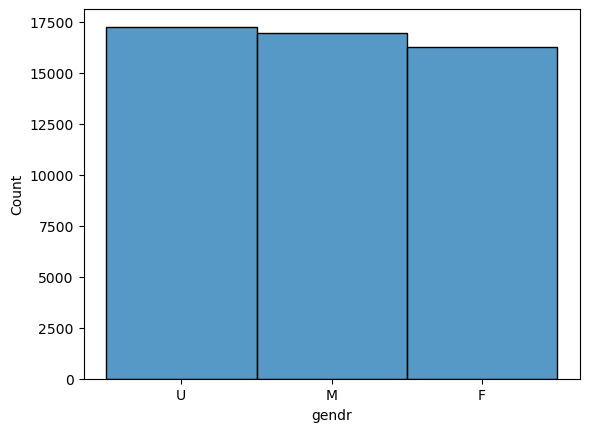

In [63]:
sns.histplot(df_clean_users, x="gendr")

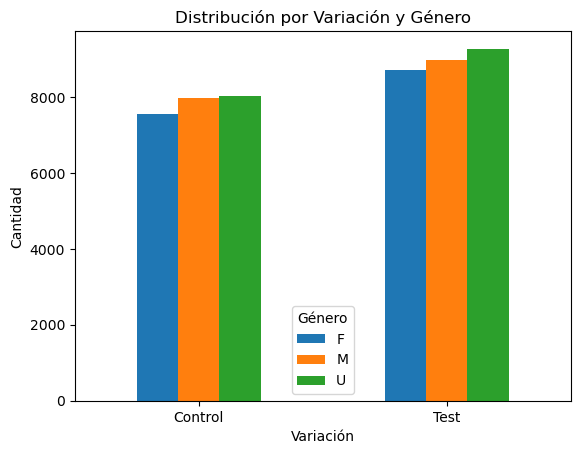

In [64]:
# Crear el DataFrame a partir de tu estructura
data_gender = {
    ('Control', 'F'): 7543,
    ('Control', 'M'): 7970,
    ('Control', 'U'): 8014,
    ('Test', 'F'): 8716,
    ('Test', 'M'): 8977,
    ('Test', 'U'): 9268
}

# Convertir el diccionario en un DataFrame con MultiIndex
df_gender = pd.Series(data_gender).unstack()

# Hacer el gráfico de barras
df_gender.plot(kind='bar')

# Configurar etiquetas y título
plt.title('Distribución por Variación y Género')
plt.xlabel('Variación')
plt.ylabel('Cantidad')
plt.legend(title='Género')
plt.xticks(rotation=0)

# Mostrar gráfico
plt.show()

### 4.1.2 Clients by Tenure

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

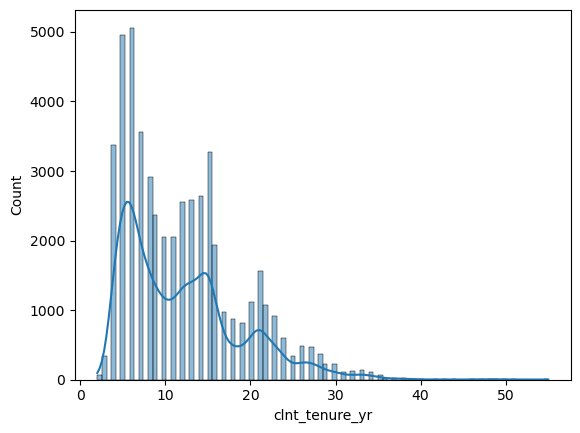

In [65]:
plt.figure()
#sns.histplot(df_sample_client, x="clnt_tenure_yr")
#kde keyword adds a line that represents the shape of the histogram
sns.histplot(df_clean_users, x="clnt_tenure_yr",kde=True)
#plt.figure(figsize=(10,10))

### 4.1.3 Clients by Age

<Axes: xlabel='clnt_age', ylabel='Count'>

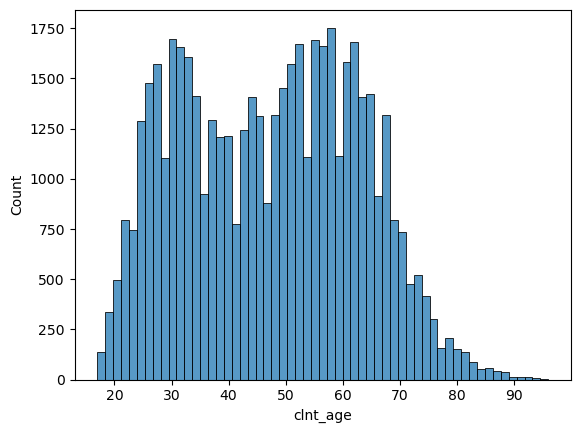

In [66]:
sns.histplot(df_clean_users, x="clnt_age")

<Axes: xlabel='edad_redondeada', ylabel='Count'>

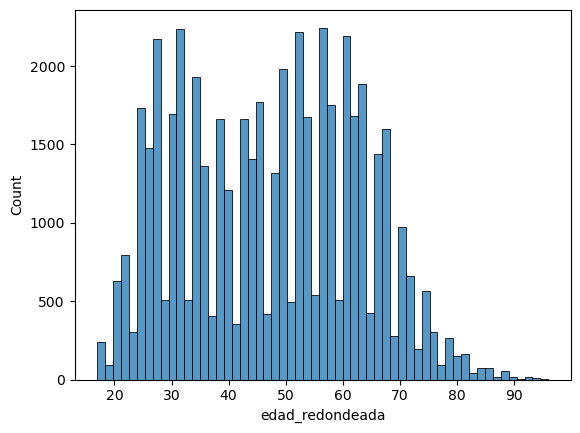

In [67]:
sns.histplot(df_clean_users, x="edad_redondeada")

### 4.1.4 Clients by owned accounts

In [68]:
df_clean_users.groupby(['num_accts'])['client_id'].count()

num_accts
1        1
2    39700
3     8937
4     1585
5      204
6       23
7        6
Name: client_id, dtype: int64

<Axes: xlabel='num_accts', ylabel='Count'>

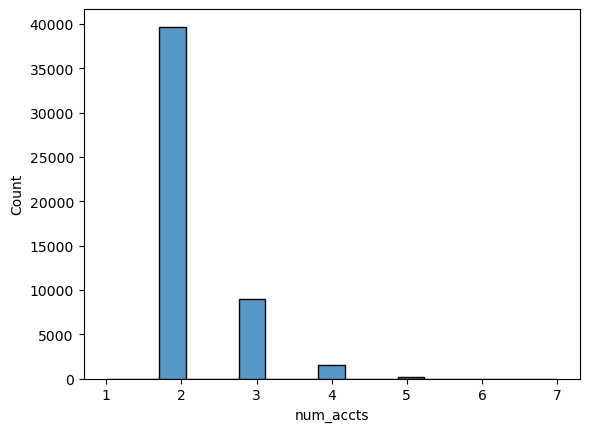

In [69]:
sns.histplot(df_clean_users, x="num_accts")

### 4.1.5 Clients by bal

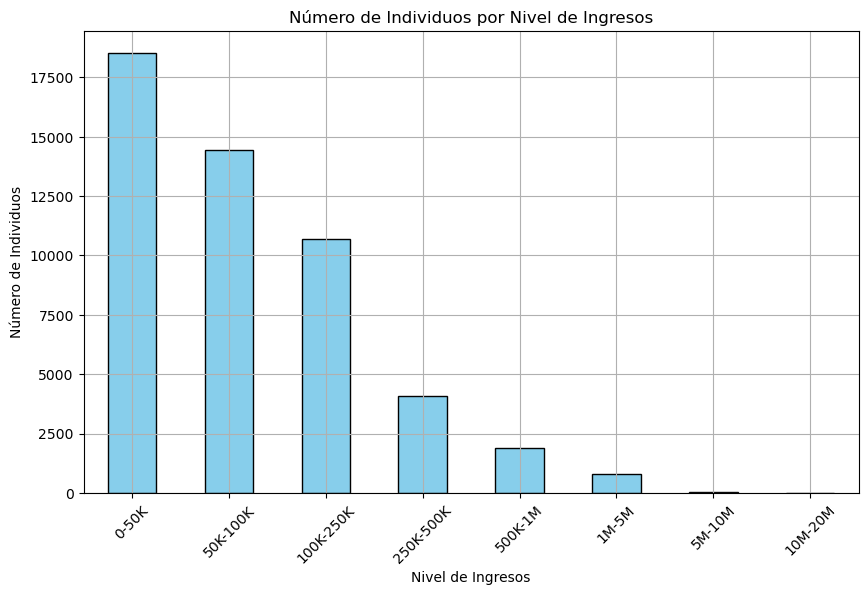

In [70]:
# Definir los límites de los grupos de ingresos
bins = [0, 50000, 100000, 250000, 500000, 1000000, 5000000, 10000000, 20000000]
labels = ['0-50K', '50K-100K', '100K-250K', '250K-500K', '500K-1M', '1M-5M', '5M-10M', '10M-20M']

# Crear una nueva columna con los grupos de ingresos
df_clean_users['full_bal'] = pd.cut(df_clean_users['bal'], bins=bins, labels=labels)

# Contar cuántos individuos hay en cada grupo
income_group_counts = df_clean_users['full_bal'].value_counts().sort_index()

# Graficar el número de individuos en cada grupo
plt.figure(figsize=(10, 6))
income_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de Individuos por Nivel de Ingresos')
plt.xlabel('Nivel de Ingresos')
plt.ylabel('Número de Individuos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 4.1.6 Clients by calls_6_mnth

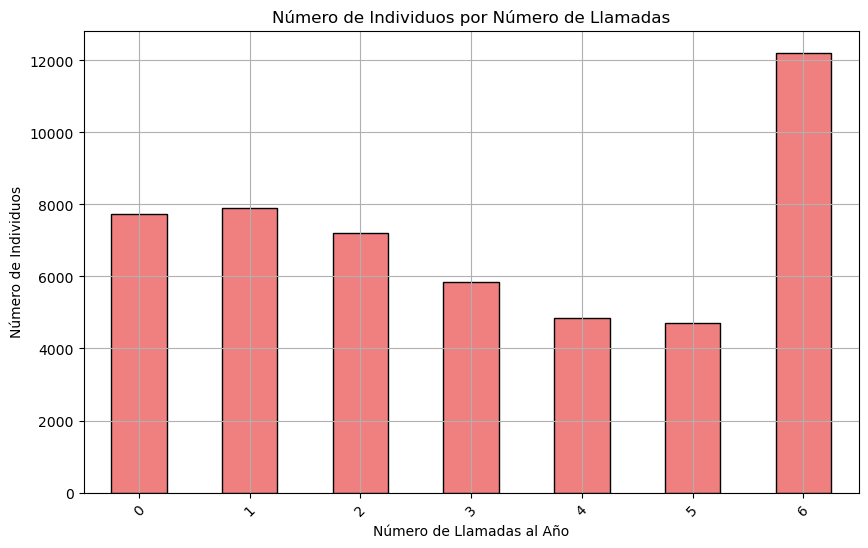

In [71]:
# Definir los límites de los grupos de llamadas
call_bins = [-1, 0, 1, 2, 3, 4, 5, 6]
call_labels = ['0','1', '2', '3', '4', '5', '6']

# Crear una nueva columna con los grupos de llamadas
df_clean_users['call_group'] = pd.cut(df_clean_users['calls_6_mnth'], bins=call_bins, labels=call_labels)

# Contar cuántos individuos hay en cada grupo de llamadas
call_group_counts = df_clean_users['call_group'].value_counts().sort_index()

# Graficar el número de individuos por grupo de llamadas
plt.figure(figsize=(10, 6))
call_group_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Número de Individuos por Número de Llamadas')
plt.xlabel('Número de Llamadas al Año')
plt.ylabel('Número de Individuos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 4.1.7 Clients by logons_6_mnth

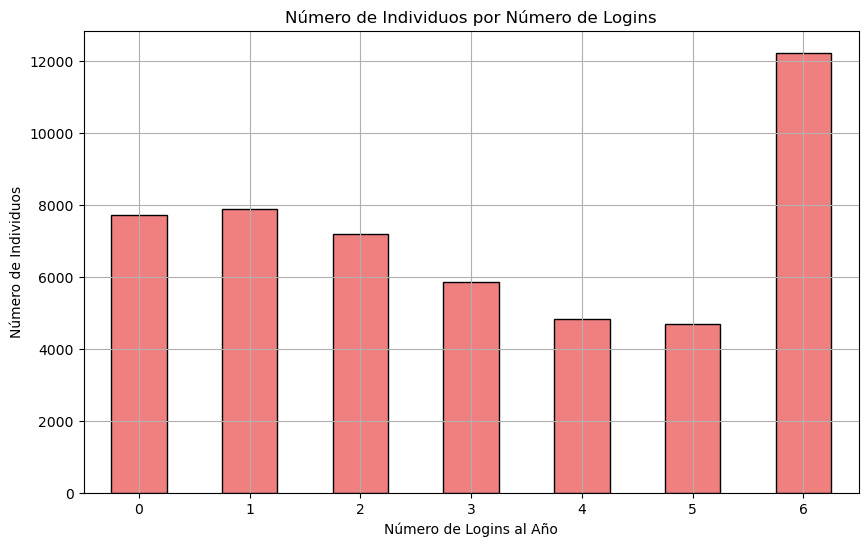

In [72]:
logins_group_counts = df_clean_users['logons_6_mnth'].value_counts().sort_index()

# Graficar el número de individuos por grupo de llamadas
plt.figure(figsize=(10, 6))
call_group_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Número de Individuos por Número de Logins')
plt.xlabel('Número de Logins al Año')
plt.ylabel('Número de Individuos')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [73]:
df_clean_users

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,edad_redondeada,full_bal,call_group
0,836976,6,73,60.5,U,2,45105.30,6,9,Test,60,0-50K,6
1,2304905,7,94,58.0,U,2,110860.30,6,9,Control,58,100K-250K,6
2,1439522,5,64,32.0,U,2,52467.79,6,9,Test,32,50K-100K,6
3,1562045,16,198,49.0,M,2,67454.65,3,6,Test,49,50K-100K,3
4,5126305,12,145,33.0,F,2,103671.75,0,3,Control,33,100K-250K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50451,1780858,21,262,68.5,M,3,372100.59,6,9,Test,68,250K-500K,6
50452,6967120,21,260,68.5,M,3,4279873.38,6,9,Control,68,1M-5M,6
50453,5826160,20,249,56.5,F,2,44837.16,2,5,Test,56,0-50K,2
50454,8739285,19,229,69.5,F,2,44994.24,1,4,Test,70,0-50K,1


### 4.1.8 Client by Variation used

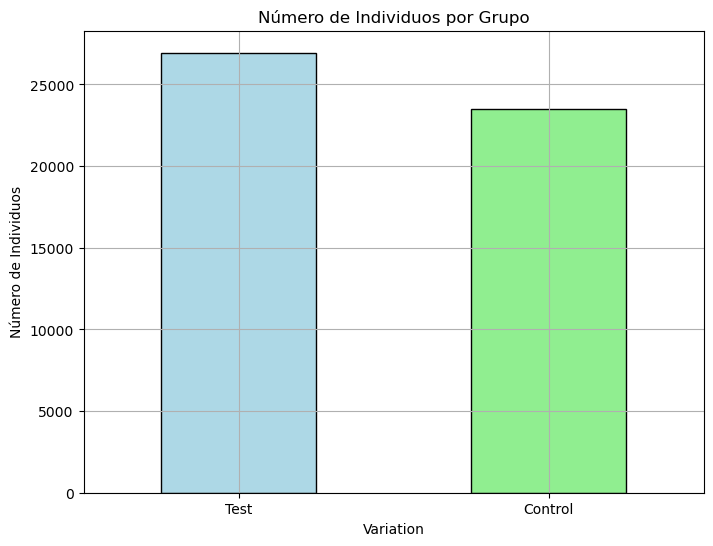

In [74]:
group_counts = df_clean_users['variation'].value_counts()
plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar', color=['lightblue', 'lightgreen'], edgecolor='black')
plt.title('Número de Individuos por Grupo')
plt.xlabel('Variation')
plt.ylabel('Número de Individuos')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

explicacion kde

La opción kde=True en sns.histplot de Seaborn añade una estimación de densidad kernel (Kernel Density Estimate, KDE) al gráfico de histograma. En lugar de solo mostrar las barras del histograma, que representan la frecuencia de los datos en cada bin, la curva KDE te da una representación suave de la distribución de los datos.

¿Qué es la estimación de densidad kernel (KDE)?
La KDE es una forma de estimar la función de densidad de probabilidad de una variable continua. En lugar de contar los datos en intervalos discretos como en un histograma, la KDE usa una función kernel (una curva suave, normalmente una gaussiana) para aproximar cómo se distribuyen los datos en el conjunto. La KDE intenta proporcionar una mejor visualización de la distribución de los datos que un histograma por sí solo, especialmente útil para datos continuos.
¿Cuándo usar KDE?
Datos continuos: La KDE es más adecuada para datos continuos donde la distribución es más fluida.
Suavidad: Es útil cuando quieres visualizar una versión suavizada del histograma, especialmente si los datos tienen picos y valles que podrían suavizarse con la curva.
Tamaño de muestra pequeño: Si tienes pocos datos, un histograma puede dar una imagen errónea de la distribución real. La KDE ayuda a suavizar la representación.
En resumen, kde=True añade una curva que representa la distribución subyacente de los datos de forma suave, complementando el histograma para dar una mejor idea de la distribución.

## 4.2 Cross EDA

# 5. Convertions

## 5.1 Conversion Rates prep

Let's create a new table for count convertions. 

In [75]:
df_conv=df_clean_fp.groupby(['client_id', 'process_step']).size().reset_index()
df_conv.columns.values[[ 2]] = [ 'counts']
df_conv=df_conv.pivot(index='client_id', columns='process_step', values='counts')
df_conv

process_step,confirm,start,step_1,step_2,step_3
client_id,,,,,
169,1.0,1.0,1.0,1.0,1.0
336,NaN,2.0,NaN,NaN,NaN
546,1.0,1.0,1.0,1.0,1.0
555,1.0,1.0,1.0,1.0,1.0
647,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
9999729,1.0,4.0,3.0,2.0,1.0
9999768,1.0,3.0,3.0,3.0,2.0
9999832,NaN,1.0,1.0,NaN,NaN


Creamos nueva columna (de start a confirm) para contar los éxitos

In [76]:
# create new column for conversion (from start to confirm) to count the conversions rate
df_conv['conversion'] = (
    (df_conv['start'] >= 1) & 
    (df_conv['step_1'] >= 0) & 
              (df_conv['step_2'] >= 0) & 
     (df_conv['step_3'] >= 0) &
     (df_conv['confirm'] >= 1)
 ).astype(int)
# Sum of clients who succeeded to go through the whole process and converted
total_conversions = df_conv['conversion'].sum()

print("Total conversions:", total_conversions)

df_conv

Total conversions: 78653


process_step,confirm,start,step_1,step_2,step_3,conversion
client_id,,,,,,
169,1.0,1.0,1.0,1.0,1.0,1
336,NaN,2.0,NaN,NaN,NaN,0
546,1.0,1.0,1.0,1.0,1.0,1
555,1.0,1.0,1.0,1.0,1.0,1
647,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...
9999729,1.0,4.0,3.0,2.0,1.0,1
9999768,1.0,3.0,3.0,3.0,2.0,1
9999832,NaN,1.0,1.0,NaN,NaN,0


Otra columna para los completed and confused

In [77]:
# create new column for completed & confused
df_conv['completed_&_confused'] = (
    (df_conv['start'] >= 1) & 
    ((df_conv['step_1'] > 1) |
     (df_conv['step_2'] > 1) |
     (df_conv['step_3'] > 1)) & 
    (df_conv['confirm'] >= 1)
).astype(int)

Otra columna para completed y Linear

In [78]:
# create new column for completed & linear

df_conv['completed_linear'] = (
    (df_conv['start'] == 1) & 
    (df_conv['step_1'] == 1) & 
    (df_conv['step_2'] == 1) & 
    (df_conv['step_3'] == 1) & 
    (df_conv['confirm'] == 1)
).astype(int)

Ahora hacemos merge de conv con exp_clean para client ID

In [79]:
# merge df_conv with df_exp_clean on client_id

df_conv= pd.merge(df_conv, df_clean_users, on='client_id')
df_conv

,client_id,confirm,start,step_1,step_2,step_3,conversion,completed_&_confused,completed_linear,clnt_tenure_yr,...,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,edad_redondeada,full_bal,call_group
0,555,1.0,1.0,1.0,1.0,1.0,1,0,1,3,...,29.5,U,2,25454.66,2,6,Test,30,0-50K,2
1,647,1.0,1.0,1.0,1.0,1.0,1,0,1,12,...,57.5,M,2,30525.80,0,4,Test,58,0-50K,0
2,934,NaN,4.0,NaN,NaN,NaN,0,0,0,9,...,51.0,F,2,32522.88,0,3,Test,51,0-50K,0
3,1028,NaN,1.0,5.0,2.0,1.0,0,0,0,12,...,36.0,M,3,103520.22,1,4,Control,36,100K-250K,1
4,1104,NaN,2.0,NaN,NaN,NaN,0,0,0,5,...,48.0,U,3,154643.94,6,9,Control,48,100K-250K,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50191,9999150,NaN,2.0,1.0,NaN,NaN,0,0,0,5,...,30.0,U,3,97141.71,6,9,Test,30,50K-100K,6
50192,9999400,1.0,1.0,1.0,1.0,1.0,1,0,1,7,...,28.5,U,2,51787.04,0,3,Test,28,50K-100K,0
50193,9999626,NaN,1.0,1.0,NaN,NaN,0,0,0,9,...,35.0,M,2,36642.88,6,9,Test,35,0-50K,6
50194,9999729,1.0,4.0,3.0,2.0,1.0,1,1,0,10,...,31.0,F,3,107059.74,6,9,Test,31,100K-250K,6


Exportamos a un csv

In [80]:
# Exporting df_conv to csv to use in hypothesis testing

df_conv.to_csv('sol_data/df_conv.csv', index=False)

Creamos función que crea tabla seccion cruzada con una columna que enseña si los clientes están asignados a test o control

In [81]:
# function that creates a crosstable with a column showing if the clients are assigned to the control
# or to the test group
def create_cross_tab(df, stat):
    df_cross = pd.DataFrame({
        'variation': ['control', 'test'], 

        'conversion': [
            
            sum(df[df['variation'] == 'Control'][stat]),
            sum(df[df['variation'] == 'Test'][stat])
        ], 
        'total': [

            len(df[df['variation'] == 'Control']),
            len(df[df['variation'] == 'Test'])],

        'proportion':[
            sum(df[df['variation'] == 'Control'][stat]) / len(df[df['variation'] == 'Control']),
            sum(df[df['variation'] == 'Test'][stat]) / len(df[df['variation'] == 'Test'])
        ]
    })
    return df_cross

## 5.1 Conversion Rates

Usamos create_cross_tab función para obtener los ratios de conversion por grupo y calcular su proporción.

In [82]:
# we use the create_cross_tab function to get the conversion rates per group
# and calculate the proportion as %
conv_rate = create_cross_tab(df_conv, 'conversion')
conv_rate["100*prop"] = conv_rate["proportion"]*100
conv_rate

,variation,conversion,total,proportion,100*prop
0,control,14726,23307,0.631827,63.182735
1,test,18259,26889,0.679051,67.905091


Calculamos el porcentaje de usuarios que confirmaron eb vez de reakuzar errores

<Axes: xlabel='variation', ylabel='proportion'>

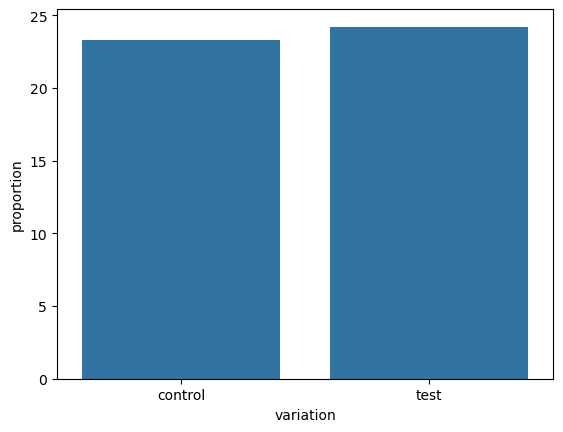

In [83]:
#we calculate the percent of users that confirmed in spite of making mistakes
non_lin_rate = create_cross_tab(df_conv, 'completed_&_confused')
sns.barplot(x='variation', y=non_lin_rate['proportion']*100, data=non_lin_rate)

## 5.2 Completed Linear Rate

,variation,conversion,total,proportion
0,control,7225,23307,0.309993
1,test,8264,26889,0.307338


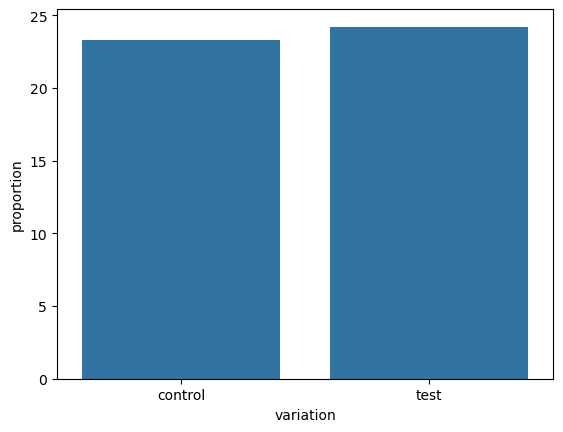

In [84]:
#the client confirmed after doing each step once
lin_rate = create_cross_tab(df_conv, 'completed_linear')
sns.barplot(x='variation', y=non_lin_rate['proportion']*100, data=lin_rate)
lin_rate

# 6. Errors

Let's see how many counts there are from any step to the previous one

In [85]:
#we convert the time column to date_time format the values by date
df_clean_fp.date_time=pd.to_datetime(df_clean_fp.date_time)

C:\Users\Carlos\AppData\Local\Temp\ipykernel_6892\2194089358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_fp.date_time=pd.to_datetime(df_clean_fp.date_time)


In [86]:
#we sort the values by date
df_clean_fp = df_clean_fp.sort_values(by=['date_time'])

#we add a column where the process_step and the client_id are lagged by 1 step
df_clean_fp['process_step_lagged'] = df_clean_fp.groupby(['visit_id'])['process_step'].shift(1)
df_clean_fp["client_id_lagged"] = df_clean_fp.groupby(['visit_id'])['client_id'].shift(1)

test = df_clean_fp

Now, we design a loop that identifiy and count the errors (those where the user go back from any step insted on forward), and make a boolean column in order to identify which clientes had errors (called error)

In [88]:
error_counter_1 = 0 #error: step_1 back to start
error_counter_2 = 0 #error: step_2 back to step_1
error_counter_3 = 0 #error: step_3 back to step_2
error_counter_4 = 0 #error: confirm back to step_3
no_error_counter = 0
test["error"] = 0
test["error_loc"] = 0
for index, row in test.iterrows():
    if (row["process_step"] == "start") and (row["process_step_lagged"] == "step_1") and (row["client_id"] == row["client_id_lagged"]):
        error_counter_1 = error_counter_1 + 1
        test.at[index,"error"] = 1
        test.at[index,"error_loc"] = row["process_step_lagged"] 
    elif (row["process_step"] == ("step_1")) and (row["process_step_lagged"] == "step_2") and (row["client_id"] == row["client_id_lagged"]):
        error_counter_2 = error_counter_2 + 1
        test.at[index,"error"] = 1
        test.at[index,"error_loc"] = row["process_step_lagged"] 
    elif (row["process_step"] == ("step_2")) and (row["process_step_lagged"] == "step_3") and (row["client_id"] == row["client_id_lagged"]):
        error_counter_3 = error_counter_3 + 1
        test.at[index,"error"] = 1
        test.at[index,"error_loc"] = row["process_step_lagged"] 
    elif (row["process_step"] == ("step_3")) and (row["process_step_lagged"] == "confirm") and (row["client_id"] == row["client_id_lagged"]):
        error_counter_4 = error_counter_4 + 1
        test.at[index,"error"] = 1
        test.at[index,"error_loc"] = row["process_step_lagged"] 
    else:
        no_error_counter = no_error_counter + 1
        test.at[index,"error"] = 0
        test.at[index,"error_loc"] = None 
print(f"Error counter 1 (step_1 --> start): {error_counter_1}")
print(f"Error counter 2 (step_2 --> step_1): {error_counter_2}")
print(f"Error counter 3 (step_3 --> step_2): {error_counter_3}")
print(f"Error counter 4 (confirm --> step_3): {error_counter_4}")
print(f"No error counter: {no_error_counter}")

C:\Users\Carlos\AppData\Local\Temp\ipykernel_6892\4011753020.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'step_2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test.at[index,"error_loc"] = row["process_step_lagged"]


Error counter 1 (step_1 --> start): 23232
Error counter 2 (step_2 --> step_1): 12182
Error counter 3 (step_3 --> step_2): 9395
Error counter 4 (confirm --> step_3): 70
No error counter: 690710


Now, let's make a graphic about it.

[3.16, 1.66, 1.28, 0.01, 93.9]


<Axes: >

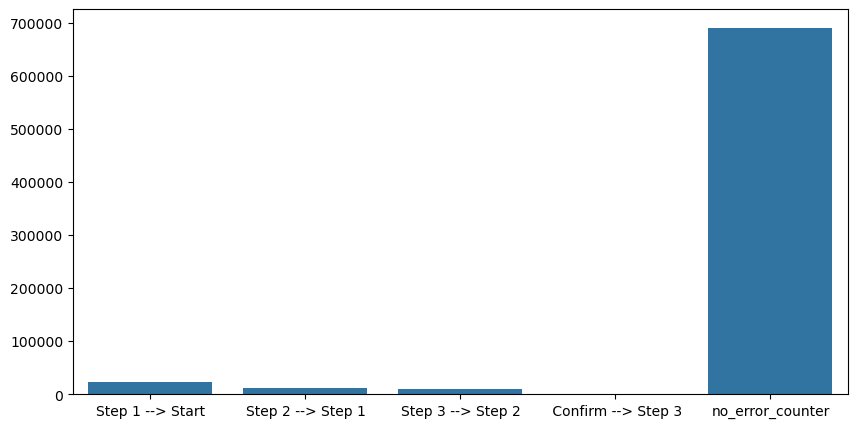

In [89]:
x = ["Step 1 --> Start","Step 2 --> Step 1","Step 3 --> Step 2"," Confirm --> Step 3","no_error_counter"]
y = [error_counter_1,error_counter_2,error_counter_3,error_counter_4,no_error_counter]

errors = pd.DataFrame(x,y)

list_percent = []
for i in y:
    list_percent.append(round(i*100/sum(y),2))
print(list_percent)

plt.figure(figsize=(10,5))
sns.barplot(errors,x=x,y=y)

In [90]:
#create a dataframe with error counters and location 
df_errors = pd.DataFrame(test,columns=["client_id","error","error_loc"])
df_errors

,client_id,error,error_loc
286566,9088444,0,None
35293,7179755,0,None
35292,7179755,0,None
35291,7179755,0,None
35290,7179755,0,None
...,...,...,...
176132,4159912,0,None
176131,4159912,0,None
176130,4159912,0,None
184010,5640210,0,None


In [91]:
df_errors= pd.merge(df_errors, df_clean_users, on='client_id')
df_errors.to_csv("df_errors.csv")

In [92]:
error_counter = create_cross_tab(df_errors,"error")
error_counter['prop*100']=error_counter['proportion']*100

In [93]:
error_counter

,variation,conversion,total,proportion,prop*100
0,control,9119,138038,0.066062,6.606152
1,test,12017,175866,0.068330,6.833043


In [94]:
#exporting to csv
error_counter.to_csv("df_error_counter.csv")

In [95]:
#This is a placeholder for the actual average time values
# just change the values here and rerun this cell and the one below to update the figure
time = pd.DataFrame({
    'variation': ['control', 'test'], 
    'duration': [268.7412,288.7408]
})
time

,variation,duration
0,control,268.7412
1,test,288.7408


Text(0, 0.5, 'Error rate (%)')

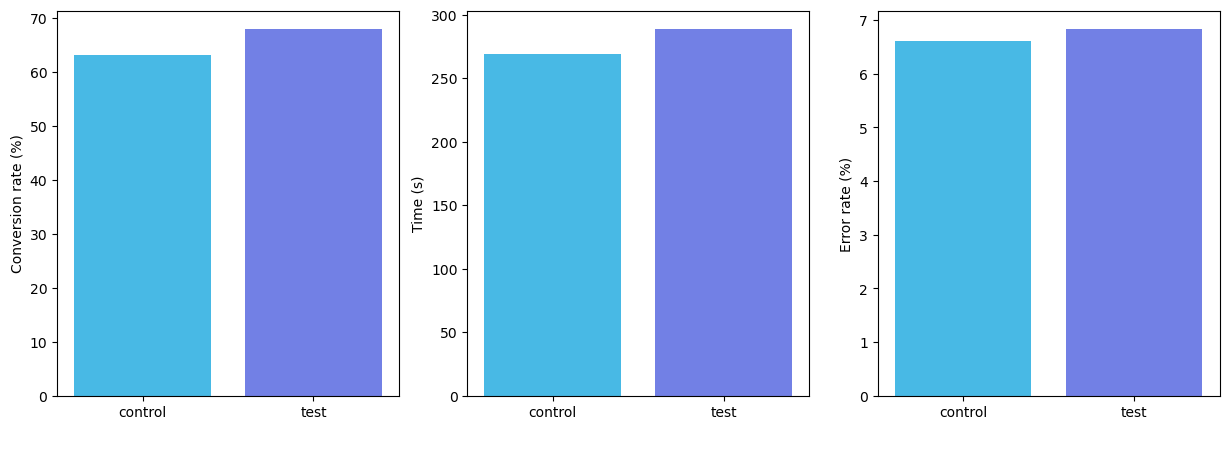

In [96]:
#vertical figure to summarize the KPI
color='#42a4fc'
palette = ['#2ec5ff','#5f72f8']
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,3,1)
sns.barplot(x='variation', y='100*prop', data=conv_rate, hue='variation', palette=palette)
plt.xlabel(" ")
plt.ylabel("Conversion rate (%)")

ax2 = plt.subplot(1,3,2)
sns.barplot(x='variation', y='duration', data=time, hue='variation', palette=palette)
plt.xlabel(" ")
plt.ylabel("Time (s)")

ax3 = plt.subplot(1,3,3)
sns.barplot(x='variation', y='prop*100', data=error_counter, hue='variation', palette=palette)
plt.xlabel(" ")
plt.ylabel("Error rate (%)")

#plt.savefig("conversion_rate.png")

# 7. Finding Outliers

## 7.1 Outliers in tenure

In [99]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil) para clnt_tenure_yr
Q1 = df_clean_users['clnt_tenure_yr'].quantile(0.25)
Q3 = df_clean_users['clnt_tenure_yr'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers_in_tenure_yr = df_clean_users[(df_clean_users['clnt_tenure_yr'] < lower_bound) | (df_clean_users['clnt_tenure_yr'] > upper_bound)]

# Mostrar cantidad de valores atípicos
print(f'Cantidad de valores atípicos en clnt_tenure_yr: {outliers_in_tenure_yr.shape[0]}')


Cantidad de valores atípicos en clnt_tenure_yr: 599


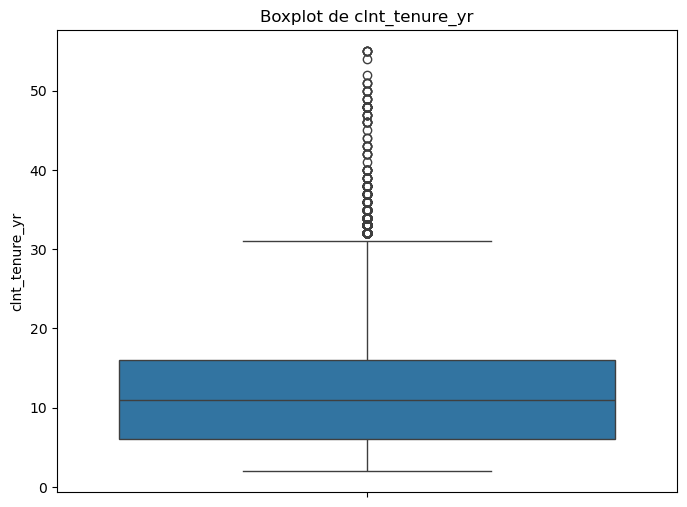

In [101]:
# Crear el boxplot para clnt_tenure_yr
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_clean_users['clnt_tenure_yr'])

# Añadir título y etiquetas
plt.title('Boxplot de clnt_tenure_yr')
plt.ylabel('clnt_tenure_yr')

# Mostrar el gráfico
plt.show()

## 7.2 Outliers in bal

In [107]:
# Identificar outliers en la columna 'bal' usando IQR
Q1_bal = df_clean_users['bal'].quantile(0.25)
Q3_bal = df_clean_users['bal'].quantile(0.75)
IQR_bal = Q3_bal - Q1_bal

# Definir límites inferior y superior
lower_bound_bal = Q1_bal - 1.5 * IQR_bal
upper_bound_bal = Q3_bal + 1.5 * IQR_bal

# Identificar los outliers en 'bal'
outliers_after_bal = df_clean_users[(df_clean_users['bal'] < lower_bound_bal) | (df_clean_users['bal'] > upper_bound_bal)]

# Guardar los outliers en un archivo CSV
outliers_after_bal.to_csv('outliers_bal.csv', index=False)

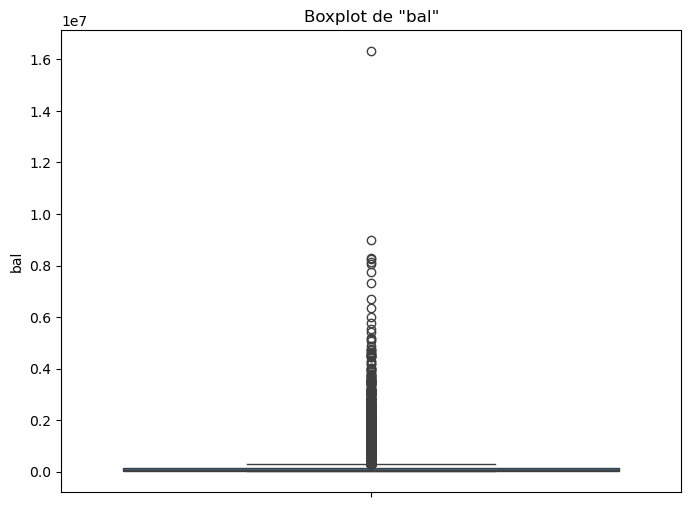

In [108]:
# Crear el boxplot para la columna 'bal'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_clean_users['bal'])

# Añadir título y etiquetas
plt.title('Boxplot de "bal"')
plt.ylabel('bal')

# Mostrar el gráfico
plt.show()

## 7.3 Outliers in age

In [109]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = df_clean_users['clnt_age'].quantile(0.25)
Q3 = df_clean_users['clnt_age'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = df_clean_users[(df_clean_users['clnt_age'] < lower_bound) | (df_clean_users['clnt_age'] > upper_bound)]

# Mostrar cantidad de valores atípicos
print(f'Cantidad de valores atípicos en clnt_age: {outliers.shape[0]}')

Cantidad de valores atípicos en clnt_age: 0


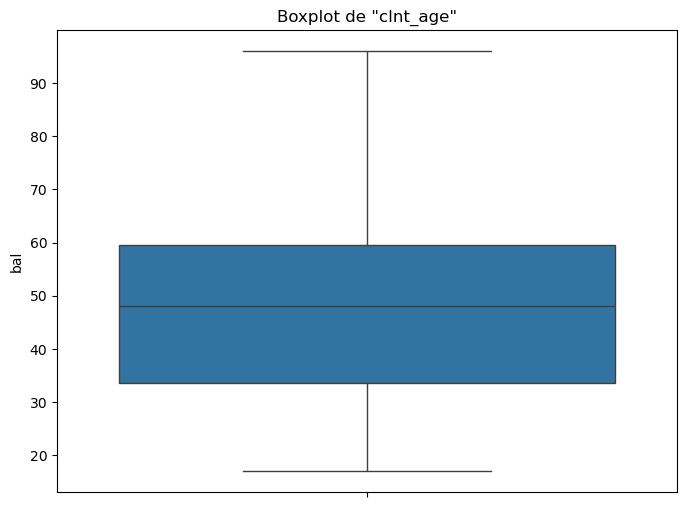

In [110]:
# Crear el boxplot para la columna 'bal'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_clean_users['clnt_age'])

# Añadir título y etiquetas
plt.title('Boxplot de "clnt_age"')
plt.ylabel('bal')

# Mostrar el gráfico
plt.show()

# 8. Contraste de Hipótesis

## 8.1 Prep

In [6]:
df_conv=pd.read_csv('df_conv.csv')
df_error_counter=pd.read_csv("df_error_counter.csv")

In [ ]:
df_time= pd.read_csv("vanguard - process step diff and step time per client id, per visit_id.csv")

In [9]:
df_exp = pd.read_csv("clean_data/df_exp_clean.csv")

In [10]:
df_error_counter

,Unnamed: 0,variation,conversion,total,proportion,prop*100
0,0,control,6358,143420,0.044331,4.433133
1,1,test,11838,177787,0.066585,6.658530


## Z-test proportion test 

Based on https://towardsdatascience.com/a-b-testing-with-binary-data-two-sample-proportions-z-test-5c222d7772ad!

In [11]:
def create_df_ztest(df,stat):
    pd.DataFrame({
    'variation': ['control', 'test'], 
    'conversion': [
        
        sum(df[df['variation'] == 'Control'].stat),
        sum(df[df['variation'] == 'Test'].stat)
    ], 
  
    'total': [

        len(df[df['variation'] == 'Control']),
        len(df[df['variation'] == 'Test'])],

    'proportion':[
        sum(df[df['variation'] == 'Control'].stat) / len(df[df['variation'] == 'Control']),
        sum(df[df['variation'] == 'Test'].stat) / len(df[df['variation'] == 'Test'])
    ]
})

In [13]:
# create data frame with counts of conversion in test and control group with extra column with total counts per sample
df_ztest = pd.DataFrame({
    'variation': ['control', 'test'], 
    'conversion': [
        
        sum(df_conv[df_conv['variation'] == 'Control'].conversion),
        sum(df_conv[df_conv['variation'] == 'Test'].conversion)
    ], 
  
    'total': [

        len(df_conv[df_conv['variation'] == 'Control']),
        len(df_conv[df_conv['variation'] == 'Test'])],

    'proportion':[
        sum(df_conv[df_conv['variation'] == 'Control'].conversion) / len(df_conv[df_conv['variation'] == 'Control']),
        sum(df_conv[df_conv['variation'] == 'Test'].conversion) / len(df_conv[df_conv['variation'] == 'Test'])
    ]
})

In [14]:
df_ztest

,variation,conversion,total,proportion
0,control,15201,23527,0.646109
1,test,18333,26961,0.679982


In [15]:
df_error_counter

,Unnamed: 0,variation,conversion,total,proportion,prop*100
0,0,control,6358,143420,0.044331,4.433133
1,1,test,11838,177787,0.066585,6.658530


In [ ]:
#run proportion test
#proportions_ztest(count=[18333, 15201], nobs=[26959,23527], alternative='larger')

In [ ]:
# Z-test definitions: 

# p1 = proportion of successes in sample 1 (control group)
# p2 = proportion of successes in sample 2 (test group)

# n1 = number of trials in sample 1
# n2 = number of trials in sample 2

#The null hypothesis states that there is no difference in the proportions, while 
#the alternative hypothesis says that proportion 1 is less than proportion 2. I.e., there is an effect of the new design.

# H0: p1 = p2
# H1: p1 < p2 (left-tailed test)

In [20]:
# Estimate sample size for z-test

def z_calc(p1, p2, n1, n2):
    p_star = (p1*n1 + p2*n2) / (n1 + n2)
    return (p2 - p1) / math.sqrt(p_star*(1 - p_star)*((1.0 / n1) + (1.0 / n2)))

def sample_required(p1, p_diff, alpha):
    if p_diff <= 0:  # p_diff = p2-p1
        raise ValueError("p_diff must be > 0")
    n = 1
    while True:
        z = z_calc(p1, p1+p_diff, n1=n, n2=n)
        p = 1 - stats.norm.cdf(z)
        if p < alpha:
            break
        n += 1
    return n

sample_size = sample_required(df_ztest[['proportion'][0]][0],(df_ztest[['proportion'][0]][1] - df_ztest[['proportion'][0]][0]), 0.05)

sample_size

1054

The minimum sample size is 1051 for each group. (this is an extra step - in our case the samples were very big anyway)

In [21]:
# Create new data frame with random sample for the z-test

df_tr = df_conv[df_conv['variation'] == 'Test']
df_ctrl = df_conv[df_conv['variation'] == 'Control']

In [22]:
df_tr_sample = df_tr.sample(n=20000, random_state=23)
df_ctrl_sample = df_ctrl.sample(n=20000, random_state=23)

In [23]:
df_sample = pd.concat([df_tr_sample, df_ctrl_sample], ignore_index=True)
df_sample.head(2)

,Unnamed: 0,client_id,confirm,start,step_1,step_2,step_3,conversion,completed_&_confused,completed_linear,variation
0,39485,7800773,NaN,3.0,1.0,1.0,NaN,0,0,0,Test
1,1518,301969,1.0,4.0,2.0,2.0,1.0,1,1,0,Test


In [24]:
df_sample_gr = df_sample.groupby('variation').agg({'conversion':'sum',
                                                    'client_id':'nunique'}).reset_index()

In [25]:
df_sample_gr['proportion'] = (df_sample_gr['conversion']) / df_sample_gr['client_id']

In [26]:
df_sample_gr

,variation,conversion,client_id,proportion
0,Control,12899,20000,0.64495
1,Test,13581,20000,0.67905


### Z-test and results

In [27]:
number_of_successes = [12899, 13626]
total_sample_sizes = [20000, 20000]

In [28]:
test_stat, p_value = proportions_ztest(number_of_successes, total_sample_sizes, alternative='smaller')

In [29]:
print("Computed z-test statistic: ", test_stat)
print("Computed p-value: ", p_value)

Computed z-test statistic:  -7.6908142674918025
Computed p-value:  7.310077118377838e-15


 In that case, we see that our result is statistically significant and we have evidence to reject the null hypothesis.

### Proportion z-test vs threshold 105%

In [30]:
#df_sample_gr

threshold=(sum(df_conv[df_conv['variation'] == 'Control'].conversion) / len(df_conv[df_conv['variation'] == 'Control']))*1.05
threshold

0.6784141624516513

In [31]:
# run z proportion test of test conversion vs p
# H0: p = p0
# H1: test > p

# Result cannot reject H0


proportions_ztest(count=18333, nobs=26959, value=threshold ,alternative='larger')

(0.5696937184289913, 0.2844427256392652)

### Duration per step testing (PENDIENTE)

In [ ]:
df_time.head()

In [ ]:
df_time.shape

In [ ]:
# boxplot of step_time  
sns.boxplot(  y='step_time', data=df_time)

In [ ]:
# remove nulls from df_time step_time

df_time2 = df_time.dropna(subset=['step_time'])

df_time2['step_time'].describe()

In [ ]:
#running again the boxplot
sns.boxplot(  y='step_time', data=df_time2)

In [ ]:
# Assigning 600 seconds max to the times >= 600s
df_time2['step_time'] = df_time2['step_time'].apply(lambda x : x if x < 600 else 600)


df_time2['step_time'].describe()

In [ ]:
df_time2.head()

In [ ]:
#DO NOT RUN
#removing outliers

def remove_outliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print("Lower Bound:", lower_bound)
    print("Upper Bound:", upper_bound)
    
    # Filter the DataFrame based on the condition
    filtered_data = data[(data[col] > lower_bound) & (data[col] < upper_bound)]

    return filtered_data

# Call the function and print the result
df_time_no_outliers = remove_outliers(df_time2, 'step_time')

In [ ]:
#DO NOT RUN
df_time_no_outliers.shape

In [ ]:
#running again the boxplot, but this time with 'replaced by 600 sec' outliers
sns.boxplot(  y='step_time', data=df_time2)

In [ ]:
# create series with control and test step_time 
time_test = df_time2[df_time2['Variation'] == 'Test']['step_time']
time_control = df_time2[df_time2['Variation'] == 'Control']['step_time']

In [ ]:
time_test.describe() 

In [ ]:
sns.histplot(time_test, kde=True, label='Test')
sns.histplot(time_control, kde=True, label='Control')

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
time_test.describe()

In [ ]:
time_control.describe()

In [ ]:
# mann whitney test for step time
# H0: test <= control
# H1: test > control
stats.mannwhitneyu(time_test, time_control, alternative='greater')

we cannot reject H0, meaning either test is smaller is there's no significant difference in terms of avg time duration

In [ ]:
df_tr_error = df_error_counter[df_error_counter['variation'] == 'Test']
df_ctrl_error = df_error_counter[df_error_counter['variation'] == 'Control']

In [ ]:
df_time2

In [ ]:
df_time2.to_csv('df_time2.csv')

In [ ]:
##Z-test on the error rates

In [ ]:
proportions_ztest(count=[11838, 6358], nobs=[177787,143420], alternative='larger')
#the error count in the test group is significantly larger than the error count on the 
# control group --> which may explain why the process wasn't more efficient and didn't meet
# the required threshold

# 9. Otros

## 9.1 Explicación KDE

Currently, we have the meaning of each column (variable) that we show here below: 

* client_id: Every client’s unique ID.
* variation: Indicates if a client was part of the experiment.
* visitor_id: A unique ID for each client-device combination.
* visit_id: A unique ID for each web visit/session.
* process_step: Marks each step in the digital process.
* date_time: Timestamp of each web activity.
* clnt_tenure_yr: Represents how long the client has been with Vanguard, measured in years.
* clnt_tenure_mnth: Further breaks down the client’s tenure with Vanguard in months.
* clnt_age: Indicates the age of the client.
* gendr: Specifies the client’s gender.
* num_accts: Denotes the number of accounts the client holds with Vanguard.
* bal: Gives the total balance spread across all accounts for a particular client.
* calls_6_mnth: Records the number of times the client reached out over a call in the past six months.
* logons_6_mnth: The frequency with which the client logged onto Vanguard’s platform over the last six months

## 9.2 Análisis de la demografía de los clientes

In [ ]:
# Análisis de la edad de los clientes
age_distribution = df_demo['clnt_age'].describe()

# Distribución de género
gender_distribution = df_demo['gendr'].value_counts()

# Número de cuentas por cliente
account_distribution = df_demo['num_accts'].value_counts()

age_distribution, gender_distribution, account_distribution

In [ ]:
# Edad promedio
average_age = df_demo['clnt_age'].mean()

# Tenencia promedio
average_tenure = df_demo['clnt_tenure_yr'].mean()

# Agrupar por edad y tenencia
age_tenure_analysis = df_demo.groupby(['clnt_tenure_yr', 'clnt_age']).size().reset_index(name='counts')

average_age, average_tenure, age_tenure_analysis

In [ ]:
# Análisis de saldo en función de la edad
age_balance_correlation = df_demo[['clnt_age', 'bal']].corr()

# Promedio de llamadas y logins por grupo de saldo
call_login_analysis = df_demo.groupby(pd.cut(df_demo['bal'], bins=[0, 100000, 500000, 1000000, 10000000])).agg({'calls_6_mnth': 'mean', 'logons_6_mnth': 'mean'})

age_balance_correlation, call_login_analysis

In [ ]:
correlation_age_accounts = df_demo['clnt_age'].corr(df_demo['num_accts'])
print("Correlación entre Edad y Número de Cuentas:", correlation_age_accounts)

In [ ]:
age_bins = [0, 30, 45, 60, 100]
age_labels = ['Joven', 'Adulto', 'Mayor', 'Anciano']
df_demo['age_group'] = pd.cut(df_demo['clnt_age'], bins=age_bins, labels=age_labels)

avg_accounts_by_age_group = df_demo.groupby('age_group')['num_accts'].mean()
print(avg_accounts_by_age_group)

In [ ]:
demographics_balance = df_demo.groupby(['clnt_age', 'gendr'])['bal'].describe()
demographics_balance

411 Análisis por gender

df_sample_client.groupby(['variation','gendr'])['client_id'].count()

In [ ]:
df1 = df_sample_client.groupby(['variation','gendr'])['client_id'].count()

promedio de llamadas y logins por grupo de saldo

In [ ]:
# Promedio de llamadas y logins por grupo de saldo
call_login_analysis = df_demo.groupby(pd.cut(df_demo['bal'], bins=[0, 100000, 500000, 1000000, 10000000])).agg({'calls_6_mnth': 'mean', 'logons_6_mnth': 'mean'})

call_login_analysis